In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, cv2

import warnings
warnings.filterwarnings('ignore')

2023-07-09 12:46:03.614117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 12:46:04.159454: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
## optimizer
rms='rmsprop'
adam='adam'

## loss
SPC = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
CC = tf.keras.losses.CategoricalCrossentropy()
BC = 'binary_crossentropy'
MSE = 'mse'

## last layer
softmax = 'softmax'
sigmoid = 'sigmoid'

In [3]:
x_numpy = np.load("csv_x_data_random_y.npz")['arr_0']
y_label = np.load("csv_y_data_random_y.npz")['arr_0']
y = (y_label==True).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_numpy,y,random_state=True,train_size=0.8,stratify=y)
x_numpy = None
y_label = None

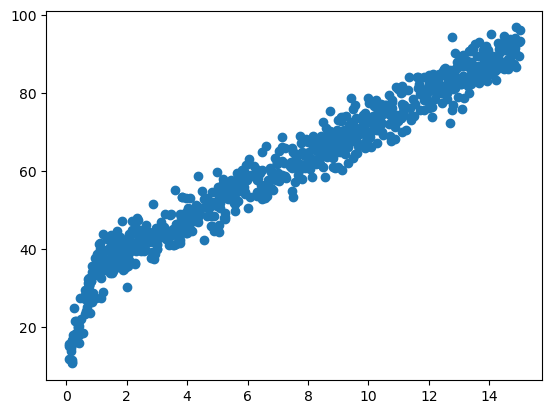

In [12]:
plt.scatter(x_train[0,:,0],x_train[0,:,1])

In [101]:
from sklearn.utils.class_weight import compute_sample_weight

In [102]:
x_train.shape

(8800, 800, 2)

In [111]:
input_shape=(800, 2)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.LSTM(16,return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(8))
# model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(8, activation='relu'))
#####
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#model.compile(loss=MSE, optimizer=rms, metrics=['accuracy'])
model.compile(loss=BC, optimizer=adam, metrics=['accuracy'])

In [112]:
print('Count Params:',model.count_params(),'\n Summary:')
model.summary()

Count Params: 2025 
 Summary:
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 800, 16)           1216      
                                                                 
 lstm_27 (LSTM)              (None, 8)                 800       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,025
Trainable params: 2,025
Non-trainable params: 0
_________________________________________________________________


---

In [116]:
model.fit(x_train,y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1811 - accuracy: 0.9322
Epoch 2/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1520 - accuracy: 0.9440
Epoch 3/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1595 - accuracy: 0.9390
Epoch 4/10
275/275 [==============================] - 8s 30ms/step - loss: 0.1336 - accuracy: 0.9522
Epoch 5/10
275/275 [==============================] - 8s 30ms/step - loss: 0.1281 - accuracy: 0.9525
Epoch 6/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1360 - accuracy: 0.9482
Epoch 7/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1335 - accuracy: 0.9508
Epoch 8/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1288 - accuracy: 0.9503
Epoch 9/10
275/275 [==============================] - 8s 30ms/step - loss: 0.1306 - accuracy: 0.9480
Epoch 10/10
275/275 [==============================] - 8s 29ms/step - loss: 0.1554 - accura

In [117]:
y_prob = model.predict(x_test)
print(y_prob.max())

69/69 [==============================] - 1s 12ms/step
0.9960997


In [119]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1200
           1       0.95      0.97      0.96      1000

    accuracy                           0.96      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.96      0.96      0.96      2200

[[1148   52]
 [  28  972]]


In [23]:
#x_train, y_train = None,None

---

## Validation

In [24]:
x_valid = np.load("x_test_data_random_y.npz")['arr_0']
y_valid = np.load("y_test_data_random_y.npz")['arr_0']
y = (y_valid==True).astype(int)

In [25]:
y_prob = model.predict(x_valid)
print(y_prob.max())
y_pred = list(map(lambda x: x>0.5,y_prob))

79/79 [==============================] - 0s 5ms/step
0.99989355


In [26]:
print(classification_report(y_valid,y_pred))
cm = confusion_matrix(y_valid,y_pred)
print(cm)
x_valid,y_valid = None,None

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2000
        True       0.79      0.69      0.73       500

    accuracy                           0.90      2500
   macro avg       0.86      0.82      0.84      2500
weighted avg       0.90      0.90      0.90      2500

[[1908   92]
 [ 157  343]]


In [16]:
#model.save_weights('models/RACMCA2')

In [ ]:
y_pred = list(map(lambda x: x>0.5,y_prob))

import pandas as pd
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
col = ['N','Y']
print(pd.DataFrame(cm,index=col,columns = col))

In [ ]:
y_test[0:5]

In [ ]:
y_pred[:5]

In [ ]:
plt.imshow(x_test[0])

In [ ]:
plt.imshow(x_test[1])

In [ ]:
plt.imshow(x_test[2])

In [ ]:
plt.imshow(x_test[3])

In [ ]:
plt.imshow(x_test[4])